# CISC 351 - Advanced Data Analytics
## Term Project (Winter 2019)
### Feature Engineering Notebook
### Home Credit Default Risk
### Mike Cruickshank


Data set is from the Home Credit Default Risk prediction competition on Kaggle
* https://www.kaggle.com/c/home-credit-default-risk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import featuretools as ft

### Import Data

In [155]:
rows = 50000
app_test = pd.read_csv("application_test.csv")
app_train = pd.read_csv("application_train.csv")
bureau = pd.read_csv("bureau.csv", nrows = rows)
bureau_balance = pd.read_csv("bureau_balance.csv", nrows = rows)
credit = pd.read_csv("credit_card_balance.csv", nrows = rows)
installments = pd.read_csv("installments_payments.csv", nrows = rows)
cash = pd.read_csv("POS_CASH_balance.csv", nrows = rows)
previous = pd.read_csv("previous_application.csv", nrows = rows)
#sample_submission = pd.read_csv("sample_submission.csv", nrows = 100)

In [151]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [12]:
interest_columns = ['AMT_ANNUITY','AMT_CREDIT','CNT_PAYMENT']
int_rate_data = previous[interest_columns]



,AMT_ANNUITY,AMT_CREDIT,CNT_PAYMENT
0,1730.430,17145.0,12.0
1,25188.615,679671.0,36.0
2,15060.735,136444.5,12.0
3,47041.335,470790.0,12.0
4,31924.395,404055.0,24.0


In [251]:
app_test['TARGET'] = np.nan

app = app_train.append(app_test, ignore_index = True, sort = True)

In [252]:
for index in ['SK_ID_CURR', 'SK_ID_PREV','SK_ID_BUREAU']:
    for dataset in [app, bureau_balance, cash, credit, previous, installments]:
        if index in list(dataset.columns):
            dataset[index] = dataset[index].fillna(0).astype(np.int64)

### Feature Tools

In [253]:
es = ft.EntitySet(id = 'clients')

#### Variable Types

In [254]:
import featuretools.variable_types as vtypes

In [255]:
app_types = {}

for col in app:
    if(app[col].nunique() == 2) and (app[col].dtype == float):
        app_types[col] = vtypes.Boolean
        
del app_types['TARGET']

print('There are {} Boolean variables in the application data.'.format(len(app_types)))

There are 0 Boolean variables in the application data.


In [256]:
app_types['REGION_RATING_CLIENT'] = vtypes.Ordinal 
app_types['REGION_RATING_CLIENT_W_CITY'] = vtypes.Ordinal 
app_types['HOUR_APPR_PROCESS_START'] = vtypes.Ordinal 

In [257]:
previous_types = {}
for col in previous:
    if (previous[col].nunique() == 2) and (previous[col].dtype == float):
        previous_types[col] = vtypes.Boolean

print('There are {} Boolean variables in previous data.'.format(len(previous_types)))


There are 1 Boolean variables in previous data.


In [258]:
installments = installments.drop(columns = ['SK_ID_CURR'])
credit = credit.drop(columns = ['SK_ID_CURR'])
cash = cash.drop(columns = ['SK_ID_CURR'])

#### Adding Entities

In [259]:
es = es.entity_from_dataframe(entity_id = 'app', dataframe = app, index = 'SK_ID_CURR',
                             variable_types = app_types)
es = es.entity_from_dataframe(entity_id = 'bureau', dataframe = bureau, index = 'SK_ID_BUREAU')

es = es.entity_from_dataframe(entity_id = 'previous', dataframe = previous, index = 'SK_ID_PREV',
                              variable_types = previous_types)

# Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'bureau_balance', dataframe = bureau_balance, 
                              make_index = True, index = 'bureaubalance_index')

es = es.entity_from_dataframe(entity_id = 'cash', dataframe = cash, 
                              make_index = True, index = 'cash_index')

es = es.entity_from_dataframe(entity_id = 'installments', dataframe = installments,
                              make_index = True, index = 'installments_index')

es = es.entity_from_dataframe(entity_id = 'credit', dataframe = credit,
                              make_index = True, index = 'credit_index')

In [260]:
es

Entityset: clients
  Entities:
    app [Rows: 20000, Columns: 122]
    bureau [Rows: 10000, Columns: 17]
    previous [Rows: 10000, Columns: 37]
    bureau_balance [Rows: 10000, Columns: 4]
    cash [Rows: 10000, Columns: 8]
    installments [Rows: 10000, Columns: 8]
    credit [Rows: 10000, Columns: 23]
  Relationships:
    No relationships

#### Adding Relationships

In [261]:
r_app_bureau = ft.Relationship(es['app']['SK_ID_CURR'], es['bureau']['SK_ID_CURR'])
r_bureau_balance = ft.Relationship(es['bureau']['SK_ID_BUREAU'], es['bureau_balance']['SK_ID_BUREAU'])

r_app_previous = ft.Relationship(es['app']['SK_ID_CURR'], es['previous']['SK_ID_CURR'])
r_previous_cash = ft.Relationship(es['previous']['SK_ID_PREV'], es['cash']['SK_ID_PREV'])
r_previous_installments = ft.Relationship(es['previous']['SK_ID_PREV'], es['installments']['SK_ID_PREV'])
r_previous_credit = ft.Relationship(es['previous']['SK_ID_PREV'], es['credit']['SK_ID_PREV'])

In [262]:
es = es.add_relationships([r_app_bureau, r_bureau_balance, r_app_previous,
                           r_previous_cash, r_previous_installments, r_previous_credit])

In [263]:
es

Entityset: clients
  Entities:
    app [Rows: 20000, Columns: 122]
    bureau [Rows: 10000, Columns: 17]
    previous [Rows: 10000, Columns: 37]
    bureau_balance [Rows: 10000, Columns: 4]
    cash [Rows: 10000, Columns: 8]
    installments [Rows: 10000, Columns: 8]
    credit [Rows: 10000, Columns: 23]
  Relationships:
    bureau.SK_ID_CURR -> app.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    previous.SK_ID_CURR -> app.SK_ID_CURR
    cash.SK_ID_PREV -> previous.SK_ID_PREV
    installments.SK_ID_PREV -> previous.SK_ID_PREV
    credit.SK_ID_PREV -> previous.SK_ID_PREV

#### Feature Primitives

In [264]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(5)


,name,type,description
0,skew,aggregation,Time since last related instance.
1,sum,aggregation,Time since last related instance.
2,min,aggregation,Time since last related instance.
3,count,aggregation,Time since last related instance.
4,num_true,aggregation,Time since last related instance.


In [265]:
primitives[primitives['type'] == 'transform'].head(5)


,name,type,description
19,numwords,transform,
20,hour,transform,
21,less_than_scalar,transform,
22,less_than,transform,
23,and,transform,


#### Deep Feature Synthesis 

In [266]:
default_agg_primitives = ['sum','std','max','skew','min','mean','count','percent_true','num_unique','mode']
default_trans_primitives = ['day','year','month','weekday','haversine','numwords','characters']

feature_names = ft.dfs(entityset = es, target_entity = 'app', 
                      trans_primitives = default_trans_primitives, 
                      agg_primitives = default_agg_primitives,
                      where_primitives = [], seed_features = [],
                      max_depth = 2, n_jobs = -1, verbose = 1,
                      features_only = True)

Built 1580 features


In [267]:
feature_names[-15:]

[<Feature: MEAN(previous.MEAN(credit.AMT_RECIVABLE))>,
 <Feature: MEAN(previous.MEAN(credit.AMT_TOTAL_RECEIVABLE))>,
 <Feature: MEAN(previous.MEAN(credit.CNT_DRAWINGS_ATM_CURRENT))>,
 <Feature: MEAN(previous.MEAN(credit.CNT_DRAWINGS_CURRENT))>,
 <Feature: MEAN(previous.MEAN(credit.CNT_DRAWINGS_OTHER_CURRENT))>,
 <Feature: MEAN(previous.MEAN(credit.CNT_DRAWINGS_POS_CURRENT))>,
 <Feature: MEAN(previous.MEAN(credit.CNT_INSTALMENT_MATURE_CUM))>,
 <Feature: MEAN(previous.MEAN(credit.SK_DPD))>,
 <Feature: MEAN(previous.MEAN(credit.SK_DPD_DEF))>,
 <Feature: MEAN(previous.COUNT(credit))>,
 <Feature: MEAN(previous.NUM_UNIQUE(credit.NAME_CONTRACT_STATUS))>,
 <Feature: NUM_UNIQUE(previous.MODE(cash.NAME_CONTRACT_STATUS))>,
 <Feature: NUM_UNIQUE(previous.MODE(credit.NAME_CONTRACT_STATUS))>,
 <Feature: MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))>,
 <Feature: MODE(previous.MODE(credit.NAME_CONTRACT_STATUS))>]

#### Selecting Primitives

In [280]:
agg_primitives = ['sum']
trans_primitives = ['day']
feature_names = ft.dfs(entityset=es, target_entity='app',
                      agg_primitives = agg_primitives, 
                      trans_primitives = trans_primitives,
                      n_jobs = -1, verbose = 1,
                      features_only = True, 
                      max_depth = 2)

Built 183 features


In [290]:
from featuretools.primitives import make_agg_primitive, make_trans_primitive

def absolute(column):
    return abs(column)

Absolute = make_trans_primitive(function=absolute,
                               input_types=[vtypes.Numeric],
                               return_type=vtypes.Numeric)

def maximum(column): 
    return max(column)

Maximum = make_agg_primitive(function=maximum, input_types=[vtypes.Numeric],
                            return_type=vtypes.Numeric)

def num_over_1000(column):
    count = 0
    for i in range(len(column)):
        if (column.iloc[i] > 1000):
            count = count + 1
    return count

NumOver1000 = make_agg_primitive(function=num_over_1000, input_types = [vtypes.Numeric],
                                return_type = vtypes.Numeric)
    

#### Run Full Deep Feature Synthesis

In [278]:
import sys
print('Total size of entityset: {:.5f} gb.'.format(sys.getsizeof(es)/1e9))

Total size of entityset: 0.05982 gb.


In [279]:
import psutil

print('Total number of cpus detected: {}.'.format(psutil.cpu_count()))
print('Total size of system memory: {:.5} gb.'.format(psutil.virtual_memory().total/1e9))

Total number of cpus detected: 4.
Total size of system memory: 12.745 gb.


In [281]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity = 'app',
                                      agg_primitives = agg_primitives, 
                                      trans_primitives = trans_primitives,
                                      n_jobs = 1, verbose = 1, features_only = False, 
                                      max_depth = 2, chunk_size = 500)

Built 183 features

Elapsed: 00:00 | Remaining: ? | Progress:   0%|          | Calculated: 0/40 chunks
Elapsed: 00:00 | Remaining: 00:15 | Progress:   2%|▎         | Calculated: 1/40 chunks
Elapsed: 00:00 | Remaining: 00:14 | Progress:   5%|▌         | Calculated: 2/40 chunks
Elapsed: 00:01 | Remaining: 00:14 | Progress:   8%|▊         | Calculated: 3/40 chunks
Elapsed: 00:01 | Remaining: 00:13 | Progress:  10%|█         | Calculated: 4/40 chunks
Elapsed: 00:01 | Remaining: 00:14 | Progress:  12%|█▎        | Calculated: 5/40 chunks
Elapsed: 00:02 | Remaining: 00:14 | Progress:  15%|█▌        | Calculated: 6/40 chunks
Elapsed: 00:02 | Remaining: 00:14 | Progress:  18%|█▊        | Calculated: 7/40 chunks
Elapsed: 00:03 | Remaining: 00:13 | Progress:  20%|██        | Calculated: 8/40 chunks
Elapsed: 00:03 | Remaining: 00:13 | Progress:  22%|██▎       | Calculated: 9/40 chunks
Elapsed: 00:04 | Remaining: 00:12 | Progress:  25%|██▌       | Calculated: 10/40 chunks
Elapsed: 00:04 | Remaining

In [291]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity = 'app',
                                      agg_primitives = [NumOver1000], 
                                      trans_primitives = [Absolute],
                                      n_jobs = 1, verbose = 1, features_only = False, 
                                      max_depth = 2, chunk_size = 500)

Built 409 features



Elapsed: 00:00 | Remaining: ? | Progress:   0%|          | Calculated: 0/40 chunks


Elapsed: 00:01 | Remaining: 00:48 | Progress:   2%|▎         | Calculated: 1/40 chunks


Elapsed: 00:02 | Remaining: 00:46 | Progress:   5%|▌         | Calculated: 2/40 chunks


Elapsed: 00:03 | Remaining: 00:46 | Progress:   8%|▊         | Calculated: 3/40 chunks


Elapsed: 00:04 | Remaining: 00:44 | Progress:  10%|█         | Calculated: 4/40 chunks


Elapsed: 00:06 | Remaining: 00:44 | Progress:  12%|█▎        | Calculated: 5/40 chunks


Elapsed: 00:07 | Remaining: 00:41 | Progress:  15%|█▌        | Calculated: 6/40 chunks


Elapsed: 00:08 | Remaining: 00:38 | Progress:  18%|█▊        | Calculated: 7/40 chunks


Elapsed: 00:09 | Remaining: 00:36 | Progress:  20%|██        | Calculated: 8/40 chunks


Elapsed: 00:10 | Remaining: 00:35 | Progress:  22%|██▎       | Calculated: 9/40 chunks


Elapsed: 00:11 | Remaining: 00:34 | Progress:  25%|██▌       | Calculated: 10/40 chunks


El

In [284]:
print(np.shape(feature_matrix))


(20000, 183)


In [292]:
feature_matrix.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,ABSOLUTE(NUM_OVER_1000(credit.AMT_RECEIVABLE_PRINCIPAL)),ABSOLUTE(NUM_OVER_1000(credit.AMT_RECIVABLE)),ABSOLUTE(NUM_OVER_1000(credit.AMT_TOTAL_RECEIVABLE)),ABSOLUTE(NUM_OVER_1000(credit.CNT_DRAWINGS_ATM_CURRENT)),ABSOLUTE(NUM_OVER_1000(credit.CNT_DRAWINGS_CURRENT)),ABSOLUTE(NUM_OVER_1000(credit.CNT_DRAWINGS_OTHER_CURRENT)),ABSOLUTE(NUM_OVER_1000(credit.CNT_DRAWINGS_POS_CURRENT)),ABSOLUTE(NUM_OVER_1000(credit.CNT_INSTALMENT_MATURE_CUM)),ABSOLUTE(NUM_OVER_1000(credit.SK_DPD)),ABSOLUTE(NUM_OVER_1000(credit.SK_DPD_DEF))
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,20560.5,568800.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,17370.0,222768.0,180000.0,99000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating Interest Rates

Use Previous table to build model of interest rate:

In [156]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [157]:
def find_interest_rate(PV,C,n):
    if (np.isnan(PV) | np.isnan(C) | np.isnan(n)):
        return  float('NaN')
    i = np.arange(0.05,40,0.05)
    dif = []
    for i_idx in range(len(i)):
        dif.append(abs(PV - (C*(1-np.power((1+0.01*i[i_idx]),-n))/(0.01*i[i_idx]))))
    min_idx = np.argmin(dif)
    return i[min_idx]
    

In [158]:
interest_columns = ['AMT_ANNUITY','AMT_CREDIT','CNT_PAYMENT']
int_rate_data = previous[interest_columns]

PV = int_rate_data['AMT_CREDIT']
C = int_rate_data['AMT_ANNUITY']
n = int_rate_data['CNT_PAYMENT']

int_rate = []
for idx in range(len(n)):
    if (idx % 5000 == 0):
        print(idx)
    int_rate.append(find_interest_rate(PV[idx],C[idx],n[idx]))



0
5000
10000
15000
20000
25000
30000
35000
40000
45000


In [160]:
previous_with_rate = previous
previous_with_rate['Calculated_Interest_Rate'] = int_rate




In [161]:
previous_with_rate.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Calculated_Interest_Rate
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,3.10
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,1.65
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,4.60
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,2.90
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,5.90


In [240]:
prev_columns = previous_with_rate.columns
app_columns = app_train.columns

In [241]:
cols = [x for x in app_columns if x in prev_columns]
print(cols)


['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


In [242]:
X_app_train = app_train[cols]
X_app_train = X_app_train.dropna(axis=0)
X_app_test = app_test[cols]
X_app_test = X_app_test.dropna(axis=0)

X_app = pd.concat([X_app_train, X_app_test])
X_app_ID = X_app['SK_ID_CURR']
X_app = X_app.drop(['SK_ID_CURR'], axis=1)



cols.extend(['Calculated_Interest_Rate'])
X_int_rate = previous_with_rate[cols]
X_int_rate = X_int_rate.dropna(axis=0)
X_int_rate = X_int_rate.drop(['SK_ID_CURR'], axis=1)
y_int_rate = X_int_rate['Calculated_Interest_Rate']
X_int_rate = X_int_rate.drop(['Calculated_Interest_Rate'], axis=1)




    SK_ID_CURR NAME_CONTRACT_TYPE  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0       100002         Cash loans    406597.5      24700.5         351000.0   
1       100003         Cash loans   1293502.5      35698.5        1129500.0   
2       100004    Revolving loans    135000.0       6750.0         135000.0   
3       100006         Cash loans    312682.5      29686.5         297000.0   
4       100007         Cash loans    513000.0      21865.5         513000.0   
5       100008         Cash loans    490495.5      27517.5         454500.0   
6       100009         Cash loans   1560726.0      41301.0        1395000.0   
7       100010         Cash loans   1530000.0      42075.0        1530000.0   
8       100011         Cash loans   1019610.0      33826.5         913500.0   
9       100012    Revolving loans    405000.0      20250.0         405000.0   
10      100014         Cash loans    652500.0      21177.0         652500.0   
11      100015         Cash loans    148365.0      1

In [210]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    cat_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = cat_columns, dummy_na = nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


In [211]:
X_int_rate, cat_cols = one_hot_encoder(X_int_rate)
X_app, cat_cols = one_hot_encoder(X_app)


cat_cols

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_CONTRACT_TYPE_nan',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_TYPE_SUITE_nan',
 'WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
 'WEEKDAY_APPR_PROCESS_START_nan']

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_int_rate, y_int_rate, test_size = 0.3)
print(np.shape(X_train))
print(np.shape(X_app))

(17794, 24)
(354016, 23)


In [219]:
app_columns = X_app.columns
prev_columns = X_train.columns

extra_cols = [x for x in prev_columns if x not in app_columns]
X_train = X_train.drop(extra_cols,axis=1)
X_test = X_test.drop(extra_cols,axis=1)

In [220]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.impute import SimpleImputer

imputer = Imputer(strategy = 'median')
scaler = StandardScaler()

imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
X_app = imputer.transform(X_app)
#app_train = imputer.transform(app_train)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_app = scaler.transform(X_app)

C:\Users\Mike\Anaconda3\envs\CISC351_Project\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [221]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_app = model.predict(X_app)

C:\Users\Mike\Anaconda3\envs\CISC351_Project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.576473004255


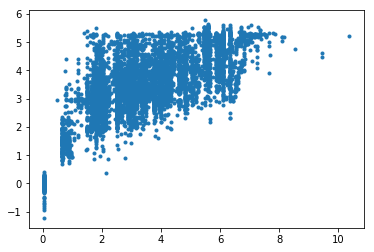

In [222]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))
plt.plot(y_test,y_pred,'.')

In [230]:
app_with_rates = pd.DataFrame()
app_with_rates['SK_ID_CURR'] = X_app_ID
app_with_rates['Predicted_Interest_Rate'] = y_pred_app

In [233]:
app_with_rates.head()
app_with_rates.to_csv('App_trainAndTest_withPredictedInterestRates.csv')

In [234]:
np.shape(app_with_rates)

(354016, 2)

In [237]:
np.size(app_train,0) + np.size(app_test,0)

356255

KeyError: "['NAME_CONTRACT_TYPE_Consumer loans'] not in index"